In [2]:
# Import data and take a look
import numpy as np
import pandas as pd

#df_flight = pd.read_csv("2007.csv", chunksize=2000000)
df_flight = pd.read_csv("2007.csv")
print(df_flight)

         Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0        2007      1           1          1   1232.0        1225   1341.0   
1        2007      1           1          1   1918.0        1905   2043.0   
2        2007      1           1          1   2206.0        2130   2334.0   
3        2007      1           1          1   1230.0        1200   1356.0   
4        2007      1           1          1    831.0         830    957.0   
5        2007      1           1          1   1430.0        1420   1553.0   
6        2007      1           1          1   1936.0        1840   2217.0   
7        2007      1           1          1    944.0         935   1223.0   
8        2007      1           1          1   1537.0        1450   1819.0   
9        2007      1           1          1   1318.0        1315   1603.0   
10       2007      1           1          1    836.0         835   1119.0   
11       2007      1           1          1   2047.0        1955   2332.0   

In [3]:
# Filter out unimportant columns

df_flight = df_flight[['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
# 'DepTime',
 'CRSDepTime',
# 'ArrTime',
 'CRSArrTime',
# 'UniqueCarrier',
 'FlightNum',
# 'TailNum',
# 'ActualElapsedTime',
# 'CRSElapsedTime',
# 'AirTime',
# 'ArrDelay',
# 'DepDelay',
# 'Origin',
# 'Dest',
 'Distance',
#  'TaxiIn',
#  'TaxiOut',
 'Cancelled']]
# 'CancellationCode',
# 'Diverted']]
# 'CarrierDelay',
# 'WeatherDelay',
# 'NASDelay',
# 'SecurityDelay',
# 'LateAircraftDelay'

In [4]:
df_flight.dtypes

Year          int64
Month         int64
DayofMonth    int64
DayOfWeek     int64
CRSDepTime    int64
CRSArrTime    int64
FlightNum     int64
Distance      int64
Cancelled     int64
dtype: object

In [5]:
# How much of your data is missing?
df_flight.isnull().sum().sort_values(ascending=False).head()

Cancelled     0
Distance      0
FlightNum     0
CRSArrTime    0
CRSDepTime    0
dtype: int64

In [6]:
# Use get_dummies in pandas 
#dummies = pd.get_dummies(df_flight['UniqueCarrier'], prefix='UniqueCarrier', dummy_na=False)
#df_flight = df_flight.drop('UniqueCarrier', 1)
#df_flight = pd.concat([df_flight, dummies], axis=1)

In [7]:
print(df_flight.describe())

            Year         Month    DayofMonth     DayOfWeek    CRSDepTime  \
count  7453215.0  7.453215e+06  7.453215e+06  7.453215e+06  7.453215e+06   
mean      2007.0  6.514876e+00  1.572589e+01  3.933804e+00  1.330596e+03   
std          0.0  3.425117e+00  8.781154e+00  1.992267e+00  4.647080e+02   
min       2007.0  1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%       2007.0  4.000000e+00  8.000000e+00  2.000000e+00  9.300000e+02   
50%       2007.0  7.000000e+00  1.600000e+01  4.000000e+00  1.322000e+03   
75%       2007.0  9.000000e+00  2.300000e+01  6.000000e+00  1.720000e+03   
max       2007.0  1.200000e+01  3.100000e+01  7.000000e+00  2.359000e+03   

         CRSArrTime     FlightNum      Distance     Cancelled  
count  7.453215e+06  7.453215e+06  7.453215e+06  7.453215e+06  
mean   1.495392e+03  2.188099e+03  7.198058e+02  2.156761e-02  
std    4.815902e+02  1.971958e+03  5.623051e+02  1.452668e-01  
min    0.000000e+00  1.000000e+00  1.100000e+01  0.000000e+

In [8]:
# Change the dtypes (int64 -> int32)

df_flight[['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'FlightNum', 
 'Distance',
 'Cancelled']] = df_flight[['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'FlightNum', 
 'Distance',
 'Cancelled']].astype('int32')

In [9]:
df_flight.dtypes

Year          int32
Month         int32
DayofMonth    int32
DayOfWeek     int32
CRSDepTime    int32
CRSArrTime    int32
FlightNum     int32
Distance      int32
Cancelled     int32
dtype: object

In [10]:
print(df_flight.head(5))

   Year  Month  DayofMonth  DayOfWeek  CRSDepTime  CRSArrTime  FlightNum  \
0  2007      1           1          1        1225        1340       2891   
1  2007      1           1          1        1905        2035        462   
2  2007      1           1          1        2130        2300       1229   
3  2007      1           1          1        1200        1330       1355   
4  2007      1           1          1         830        1000       2278   

   Distance  Cancelled  
0       389          0  
1       479          0  
2       479          0  
3       479          0  
4       479          0  


In [11]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 10)
    q3 = np.percentile(x, 90)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [12]:
tukey_indices, tukey_values = find_outliers_tukey(df_flight['Distance'])
print(np.sort(tukey_values))

[3711 3711 3711 ... 4962 4962 4962]


In [13]:
# Take a look at the outcome variable: 'Distance'
print((df_flight['Distance'] > 3711) .value_counts())

False    7445437
True        7778
Name: Distance, dtype: int64


In [14]:
# Use pyplot in matplotlib to plot histograms
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

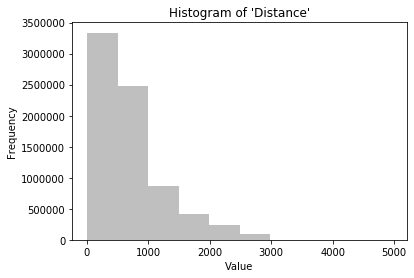

In [15]:
plot_histogram(df_flight['Distance'])

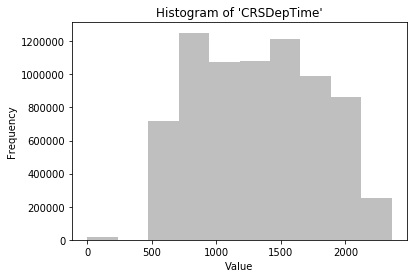

In [16]:
plot_histogram(df_flight['CRSDepTime'])  

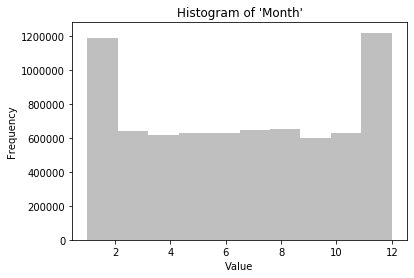

In [17]:
plot_histogram(df_flight['Month'])

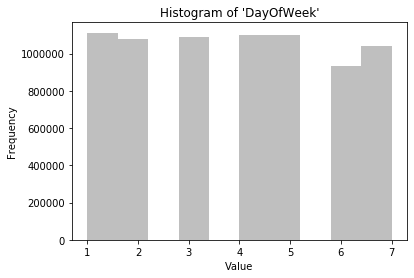

In [18]:
plot_histogram(df_flight['DayOfWeek'])

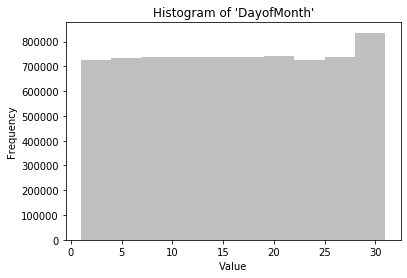

In [19]:
plot_histogram(df_flight['DayofMonth'])

In [20]:
# Use PCA from sklearn.decompostion to find principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
df_flight_pca = pd.DataFrame(pca.fit_transform(df_flight))

In [21]:
print(df_flight_pca.head(5))
plt.show()

             0            1           2          3          4
0   735.134177   187.665993 -250.500190  20.206383 -14.746967
1 -1696.894449  -761.369086 -445.577259  29.157122 -14.739025
2  -936.723234 -1116.265620 -375.095377  10.197230 -14.731199
3  -801.623652   225.551030 -320.772139   9.118020 -14.752230
4   119.784015   709.838546 -207.541690 -28.048869 -14.757038
